# Produces graphs like CMD, L functions etc.

In [1]:
%matplotlib inline
import numpy as np
from astropy import stats
import pandas as pd
import glob, os
import nway
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.stats import gaussian_kde
from scipy.stats import halfnorm
from astropy.stats.histogram import knuth_bin_width
from scipy.optimize import curve_fit
from astropy import units as u
from astropy.io import ascii, fits
from astropy.table import join, hstack, Table, Column, vstack
from astropy.coordinates import Angle, Latitude, Longitude, SkyCoord

# Set colour palette & plot layouts
import seaborn as sns     #; sns.set()
sns.set_context("paper")   # "paper", "notebook", "talk", "poster"

# Catalogue Operations

In [253]:
# Read in the file with the clean data
clean_file = 'good_data_flagged.csv'
clean_data = ascii.read(clean_file, data_start=1)
print(len(clean_data))
#print(np.max(clean_data['mag_36_1']))
#print(np.max(clean_data['mag_36_3']))
#print(np.max(clean_data['mag_36_4']))
#print(np.max(clean_data['mag_45_1']))
#print(np.max(clean_data['mag_45_3']))
#print(np.max(clean_data['mag_45_4']))

# Read in background M31 file
bgd_file = 'good_bgd_data.csv'
bgd_data = ascii.read(bgd_file, data_start=1)
print(len(bgd_data))
#print(np.max(bgd_data['mag_36_0']))
#print(np.max(bgd_data['mag_45_0']))

# Read in unclean data
unclean_file = 'unclean_data.csv'
unclean_data = ascii.read(unclean_file, data_start=1)
print(len(unclean_data))

scale_M31_M32 = len(clean_data)/len(bgd_data)
print(scale_M31_M32)

1091
2242
1387
0.48661909009812665



36_1 corrected [ -1.  -0.   7.  55. 150. 143.  88. -34. -30.  -3.  -0.   0.]
36_3 corrected [ -1.   2.   2.  41. 101. 102.  34. -60. -36.  -4.  -0.   0.]
36_4 corrected [ -1.   1.   4.  41. 121.  82.  48. -55. -34.  -4.  -0.   0.]
45_1 corrected [ -0.   0.   4.  29. 118. 124. 109.  88. -36. -50.  -7.   0.]
45_3 corrected [ -0.  -1.   3.  33.  77. 128.  56.  44. -40. -54.  -7.   0.]
45_4 corrected [ -2.  -1.   4.  30.  76. 121.  64.  38. -38. -47.  -6.   0.]
Number of variable sources in the catalogue: 51
36_1 variables:  [ 0.  1.  7. 12. 17.  6.  4.  1.  0.  0.  0.  0.]
36_3 variables:  [ 0.  2.  5. 10. 16.  6.  6.  2.  0.  0.  0.  0.]
36_4 variables:  [ 0.  1.  5. 18. 13.  9.  0.  1.  1.  0.  0.  0.]
45_1 variables:  [ 2.  2.  4. 11. 15.  8.  7.  1.  0.  0.  0.  0.]
45_3 variables:  [ 2.  1.  4. 13. 12.  7.  5.  2.  1.  0.  0.  0.]
45_4 variables:  [ 0.  2.  6. 14. 12.  9.  2.  1.  1.  0.  0.  0.]


Text(0.5, 1.0, 'Variables per magnitude bin')

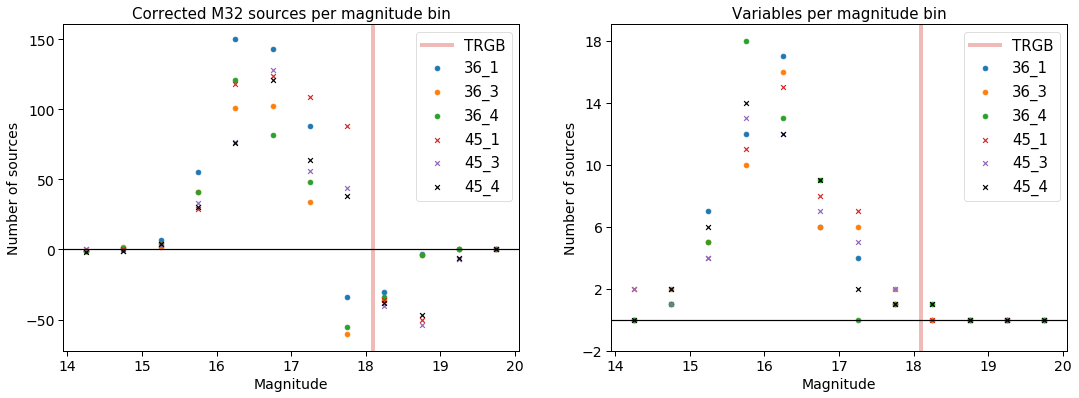

In [274]:
from scipy.stats import binned_statistic as binstat
bins_mag=np.arange(14,20.5,0.5) #Nothing fainter than 20 so last bin is 19.5 to 20

# Find C_i_M31
bin_counts_36_0, bin_edges_36_0, binnumber_36_0 = binstat(bgd_data['mag_36_0'],values=None,statistic='count',bins=bins_mag)
#print("36_0: ",bin_counts_36_0)
bin_counts_45_0, bin_edges_45_0, binnumber_45_0 = binstat(bgd_data['mag_45_0'],values=None,statistic='count',bins=bins_mag)
#print("45_0: ",bin_counts_45_0)

# Find C_i_M32
bin_counts_36_mean, bin_edges_36_mean, binnumber_36_mean = binstat(clean_data['mean_mag_36'],values=None,statistic='count',bins=bins_mag)
#print("36_mean: ",bin_counts_36_mean)
bin_counts_45_mean, bin_edges_45_mean, binnumber_45_mean = binstat(clean_data['mean_mag_45'],values=None,statistic='count',bins=bins_mag)
#print("45_mean: ",bin_counts_45_mean)
# Don't need to remove bad data here as we are only counting sources in the specified region (!=-99)
bin_counts_36_1, bin_edges_36_1, binnumber_36_1 = binstat(clean_data['mag_36_1'],values=None,statistic='count',bins=bins_mag)
#print("36_1: ",bin_counts_36_1)
bin_counts_45_1, bin_edges_45_1, binnumber_45_1 = binstat(clean_data['mag_45_1'],values=None,statistic='count',bins=bins_mag)
#print("45_1: ",bin_counts_45_1)
bin_counts_36_3, bin_edges_36_3, binnumber_36_3 = binstat(clean_data['mag_36_3'],values=None,statistic='count',bins=bins_mag)
#print("36_3: ",bin_counts_36_3)
bin_counts_45_3, bin_edges_45_3, binnumber_45_3 = binstat(clean_data['mag_45_3'],values=None,statistic='count',bins=bins_mag)
#print("45_3: ",bin_counts_45_3)
bin_counts_36_4, bin_edges_36_4, binnumber_36_4 = binstat(clean_data['mag_36_4'],values=None,statistic='count',bins=bins_mag)
#print("36_4: ",bin_counts_36_4)
bin_counts_45_4, bin_edges_45_4, binnumber_45_4 = binstat(clean_data['mag_45_4'],values=None,statistic='count',bins=bins_mag)
#print("45_4: ",bin_counts_45_4)

cf_list_36_M31 = np.array([0.986878793,0.989802525,0.986566186,0.977756286,0.971537949,0.952799479,
                         0.912958115,0.833938594,0.730043061,0.608327912,0.43113577,0.276047611])
cf_list_45_M31 = np.array([0.99396608,0.992516675,0.98988764,0.981939473,0.970317793,0.929207841,
                         0.861268781,0.776867628,0.663057531,0.483034258,0.302808898,0.205102551])
cf_list_36_M32 = np.array([0.987698868,0.990127852,0.982634338,0.971949057,0.95539281,0.916341146,
                       0.849149215,0.737867283,0.612454455,0.457784285,0.297650131,0.198858075])
cf_list_45_M32 = np.array([0.993637847,0.993187579,0.986484259,0.979598498,0.957607995,0.917121588,
                       0.833498513,0.722687668,0.569235794,0.390434358,0.260214008,0.188349515])

# Introduce extra factor of scale_M31_M32~0.5 at the start due to source density ratio
FnCn_array_36 = scale_M31_M32*(2/3)*bin_counts_36_0*(cf_list_36_M32/cf_list_36_M31)
FnCn_array_45 = scale_M31_M32*(2/3)*bin_counts_45_0*(cf_list_45_M32/cf_list_45_M31)

C_36_1_list = np.around(bin_counts_36_1-FnCn_array_36,decimals=0)
print("\n36_1 corrected",C_36_1_list)
C_36_3_list = np.around(bin_counts_36_3-FnCn_array_36,decimals=0)
print("36_3 corrected",C_36_3_list)
C_36_4_list = np.around(bin_counts_36_4-FnCn_array_36,decimals=0)
print("36_4 corrected",C_36_4_list)

C_45_1_list = np.around(bin_counts_45_1-FnCn_array_45,decimals=0)
print("45_1 corrected",C_45_1_list)
C_45_3_list = np.around(bin_counts_45_3-FnCn_array_45,decimals=0)
print("45_3 corrected",C_45_3_list)
C_45_4_list = np.around(bin_counts_45_4-FnCn_array_45,decimals=0)
print("45_4 corrected",C_45_4_list)

# Add together flags of variability to get how many pairs out of a possible 3 a source is variable in
clean_data['variable_times']=clean_data['variable_1_3']+clean_data['variable_1_4']+clean_data['variable_3_4']

# Find number of variables in each bin for each epoch pair
variable_source_idx = np.where(clean_data['variable_times']>0)
print("Number of variable sources in the catalogue:",len(variable_source_idx[0]))
variables_36_1,edg,binn = binstat(clean_data['mag_36_1'][variable_source_idx],values=None,statistic='count',bins=bins_mag)
print("36_1 variables: ",variables_36_1)
variables_36_3,edg,binn = binstat(clean_data['mag_36_3'][variable_source_idx],values=None,statistic='count',bins=bins_mag)
print("36_3 variables: ",variables_36_3)
variables_36_4,edg,binn = binstat(clean_data['mag_36_4'][variable_source_idx],values=None,statistic='count',bins=bins_mag)
print("36_4 variables: ",variables_36_4)

variables_45_1,edg,binn = binstat(clean_data['mag_45_1'][variable_source_idx],values=None,statistic='count',bins=bins_mag)
print("45_1 variables: ",variables_45_1)
variables_45_3,edg,binn = binstat(clean_data['mag_45_3'][variable_source_idx],values=None,statistic='count',bins=bins_mag)
print("45_3 variables: ",variables_45_3)
variables_45_4,edg,binn = binstat(clean_data['mag_45_4'][variable_source_idx],values=None,statistic='count',bins=bins_mag)
print("45_4 variables: ",variables_45_4)


# Plot scatter graph showing each element of the corrected list for each filter/epoch combo
rangex = bins_mag+(20-14)/(12*2)
x=rangex[0:len(rangex)-1]

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=15)
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.axvline(x=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')

plt.scatter(x,C_36_1_list,label='36_1',marker='o')
plt.scatter(x,C_36_3_list,label='36_3',marker='o')
plt.scatter(x,C_36_4_list,label='36_4',marker='o')
plt.scatter(x,C_45_1_list,label='45_1',marker='x')
plt.scatter(x,C_45_3_list,label='45_3',marker='x')
plt.scatter(x,C_45_4_list,label='45_4',marker='x',color='black')
plt.axhline(y=0,color='black')
plt.xlabel('Magnitude')
plt.ylabel('Number of sources')
plt.legend(loc="upper right",frameon=True, scatterpoints=1, numpoints=1, markerscale=1.)
plt.title('Corrected M32 sources per magnitude bin',fontsize=15)

plt.subplot(1,2,2)
plt.axvline(x=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.scatter(x,variables_36_1,label='36_1',marker='o')
plt.scatter(x,variables_36_3,label='36_3',marker='o')
plt.scatter(x,variables_36_4,label='36_4',marker='o')
plt.scatter(x,variables_45_1,label='45_1',marker='x')
plt.scatter(x,variables_45_3,label='45_3',marker='x')
plt.scatter(x,variables_45_4,label='45_4',marker='x',color='black')
plt.axhline(y=0,color='black')
plt.xlabel('Magnitude')
plt.ylabel('Number of sources')
plt.yticks(np.arange(-2,20,4))
plt.legend(loc="upper right",frameon=True, scatterpoints=1, numpoints=1, markerscale=1.)
plt.title('Variables per magnitude bin',fontsize=15)

In [52]:
bin_idx=np.where((bgd_data['mag_45_0']<18)&(bgd_data['mag_45_0']>=17.5))
print(len(bin_idx[0]))

503


# Dust estimates!

Number of variable sources:  51
Number of variable sources as % of entire catalogue:  4.674610449129239
Variable in all 3 pairs of epochs:  2

Dust production rate:  3.01e-10 M_sol/yr
Dust production rate limits:  1.12e-10  -  8.04e-10 M_sol/yr

Dust production rate:  4.01e-10 M_sol/yr
Dust production rate limits:  1.70e-10  -  9.46e-10 M_sol/yr


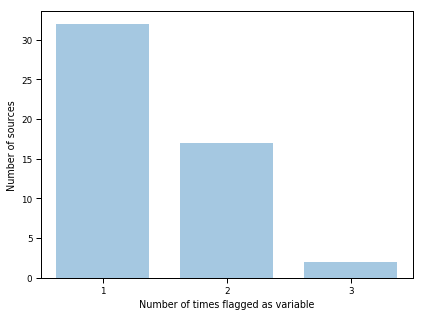

In [77]:
# Estimate dust budget for variable stars

ig = plt.figure(figsize=(6,4.5))
bins = np.arange(5) - 0.5 #add one for Python limit, one due to 0.5 shift
#bins = [1,2,3,4]
ax = sns.distplot(clean_data['variable_times'][np.where(clean_data['variable_times']>0)] ,kde=False, bins=bins,
                 hist_kws={"rwidth":0.75})
#ax = sns.countplot(pr_data[param_best_name], color='steelblue')
#ax.set_yscale('log')
ax.set_xlabel('Number of times flagged as variable')
ax.set_ylabel('Number of sources')
plt.tight_layout()
ax.set_xticks([1,2,3])
ax.set_xlim(0.5,3.5)
#save_name = str('hist_'+param_best_name+'.pdf')
#plt.savefig(save_name, bbox_inches='tight')

# Could take sources in the 2 and 3 range as high confidence and those flagging only once as low confidence variables...

# Take mean colour of all sources that are variable (currently any of those on histogram)
# Assume we use mean colour of the entire data set pertaining to a variable source (not just epochs classes as variables)
print("Number of variable sources: ",len(variable_source_idx[0]))
print("Number of variable sources as % of entire catalogue: ",100*len(variable_source_idx[0])/len(clean_data))
test_idx = np.where(clean_data['variable_times']==3)
print("Variable in all 3 pairs of epochs: ",len(test_idx[0]))

# Find sources claiming to be variable in a number of pairs of epochs
print("")
mean_colour_array_123 = clean_data['mean_mag_36'][variable_source_idx]-clean_data['mean_mag_45'][variable_source_idx]
mean_colour_variables_123 = np.mean(mean_colour_array_123)
std_colour_variables_123 = np.std(mean_colour_array_123)
D=np.power(10,-9.5+(1.4*mean_colour_variables_123))
D=np.format_float_scientific(D,2)
print("Dust production rate: ",D,"M_sol/yr")
D_low = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_variables_123-std_colour_variables_123))),2)
D_high = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_variables_123+std_colour_variables_123))),2)
print("Dust production rate limits: ",D_low," - ",D_high,"M_sol/yr")

print("")
var_23_idx = np.where(clean_data['variable_times']>1)
mean_colour_array_23 = clean_data['mean_mag_36'][var_23_idx]-clean_data['mean_mag_45'][var_23_idx]
mean_colour_variables_23 = np.mean(mean_colour_array_23)
std_colour_variables_23 = np.std(mean_colour_array_23)
D=np.power(10,-9.5+(1.4*mean_colour_variables_23))
D=np.format_float_scientific(D,2)
print("Dust production rate: ",D,"M_sol/yr")
D_low = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_variables_23-std_colour_variables_23))),2)
D_high = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_variables_23+std_colour_variables_23))),2)
print("Dust production rate limits: ",D_low," - ",D_high,"M_sol/yr")

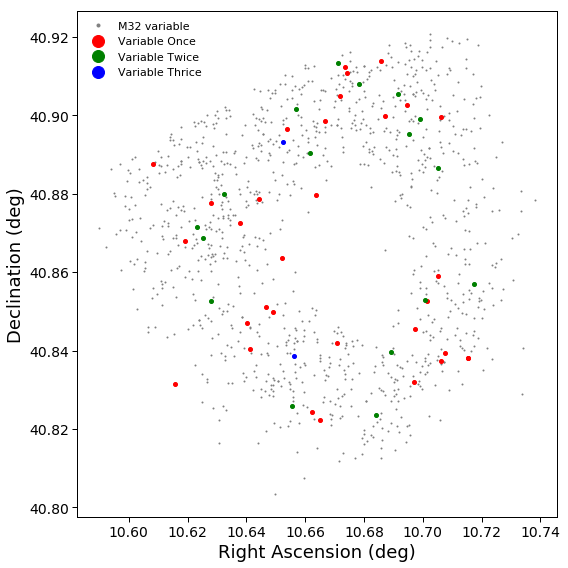

In [271]:
# Location plot of variables split by the histogram above

once_idx = np.where(variable_data['variable_times']==1)
twice_idx = np.where(variable_data['variable_times']==2)
thrice_idx = np.where(variable_data['variable_times']==3)

# Setting up figure
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=11)
plt.figure(figsize=(8,8))
ax = plt.gca()                        # Sets up active plot region

# Make the actual plot
plt.plot(clean_data['RA'], clean_data['Dec'], '.', color='grey', ms=2, label="M32 variable")
plt.plot(variable_data['RA'][once_idx], variable_data['Dec'][once_idx], 'o', color='red', ms=4, label="Variable Once")
plt.plot(variable_data['RA'][twice_idx], variable_data['Dec'][twice_idx], 'o', color='green', ms=4, label="Variable Twice")  
plt.plot(variable_data['RA'][thrice_idx], variable_data['Dec'][thrice_idx], 'o', color='blue', ms=4, label="Variable Thrice")  

plt.xlabel('Right Ascension (deg)', size=18)
plt.ylabel('Declination (deg)', size=18)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
#plt.title('M32 epoch 1',fontsize=18)

#plt.savefig("blah.pdf", bbox_inches='tight')
plt.tight_layout()
plt.show()
plt.close()

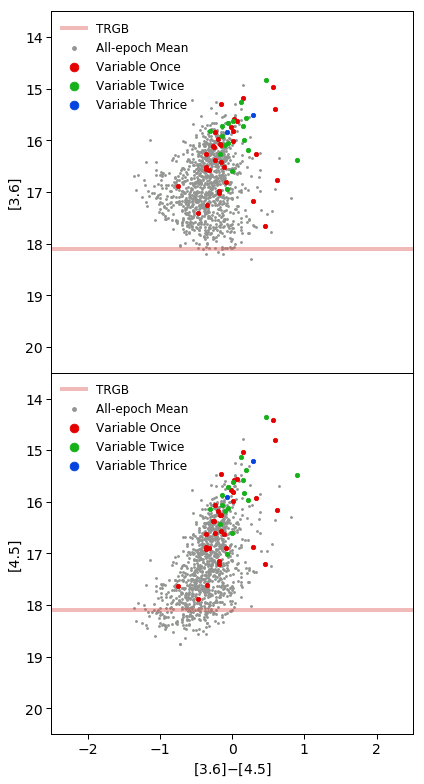

In [273]:
# Mean CMD with variables overplotted according to above histogram

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=12)
plt.figure(figsize=(6,11))

plt.subplot(2,1,1)
# Plot all sensible stars
plt.scatter(clean_data['mean_mag_36']-clean_data['mean_mag_45'], clean_data['mean_mag_36'], s=3.9,color=sns.xkcd_rgb['grey'], label="All-epoch Mean")
# Overplot variable sources
plt.scatter(variable_data['mean_mag_36'][once_idx]-variable_data['mean_mag_45'][once_idx], variable_data['mean_mag_36'][once_idx],s=19,color=sns.xkcd_rgb['red'],label="Variable Once")
plt.scatter(variable_data['mean_mag_36'][twice_idx]-variable_data['mean_mag_45'][twice_idx], variable_data['mean_mag_36'][twice_idx],s=19,color=sns.xkcd_rgb['green'],label="Variable Twice")
plt.scatter(variable_data['mean_mag_36'][thrice_idx]-variable_data['mean_mag_45'][thrice_idx], variable_data['mean_mag_36'][thrice_idx],s=19,color=sns.xkcd_rgb['blue'],label="Variable Thrice")
plt.ylabel("[3.6]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)
#Add TRGB
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=2.)

# Repeat for 4.5 on the y-axis
plt.subplot(2,1,2)
plt.scatter(clean_data['mean_mag_36']-clean_data['mean_mag_45'], clean_data['mean_mag_45'], s=3.9,color=sns.xkcd_rgb['grey'], label="All-epoch Mean")
# Overplot variable sources
plt.scatter(variable_data['mean_mag_36'][once_idx]-variable_data['mean_mag_45'][once_idx], variable_data['mean_mag_45'][once_idx],s=19,color=sns.xkcd_rgb['red'],label="Variable Once")
plt.scatter(variable_data['mean_mag_36'][twice_idx]-variable_data['mean_mag_45'][twice_idx], variable_data['mean_mag_45'][twice_idx],s=19,color=sns.xkcd_rgb['green'],label="Variable Twice")
plt.scatter(variable_data['mean_mag_36'][thrice_idx]-variable_data['mean_mag_45'][thrice_idx], variable_data['mean_mag_45'][thrice_idx],s=19,color=sns.xkcd_rgb['blue'],label="Variable Thrice")
plt.xlabel("[3.6]$-$[4.5]", fontsize=14)
plt.ylabel("[4.5]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)
#plt.axvline(x=1.5)
#plt.axvline(x=-1.6)
#Add TRGB
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=2.)
#plt.title('M32 E3', fontsize=18)
#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.show()
plt.close()

Number of evolved sources:  38
Number of evolved sources as % of entire catalogue:  3.483043079743355
evolved in all 3 epochs:  5

Dust production rate:  5.77e-10 M_sol/yr
Dust production rate limits:  2.73e-10  -  1.22e-09 M_sol/yr

Dust production rate:  8.36e-10 M_sol/yr
Dust production rate limits:  3.99e-10  -  1.75e-09 M_sol/yr


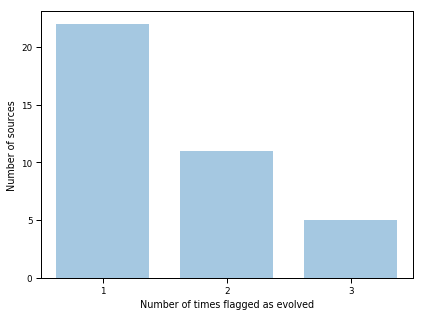

In [79]:
# Estimate dust budget for evoled stars
clean_data['evolved_times']=clean_data['evolved_1']+clean_data['evolved_3']+clean_data['evolved_4']

ig = plt.figure(figsize=(6,4.5))
bins = np.arange(5) - 0.5 #add one for Python limit, one due to 0.5 shift
#bins = [1,2,3,4]
ax = sns.distplot(clean_data['evolved_times'][np.where(clean_data['evolved_times']>0)] ,kde=False, bins=bins,
                 hist_kws={"rwidth":0.75})
#ax = sns.countplot(pr_data[param_best_name], color='steelblue')
#ax.set_yscale('log')
ax.set_xlabel('Number of times flagged as evolved')
ax.set_ylabel('Number of sources')
plt.tight_layout()
ax.set_xticks([1,2,3])
ax.set_xlim(0.5,3.5)
#save_name = str('hist_'+param_best_name+'.pdf')
#plt.savefig(save_name, bbox_inches='tight')

# Could take sources in the 2 and 3 range as high confidence and those flagging only once as low confidence evolveds...

# Take mean colour of all sources that are evolved (currently any of those on histogram)
# Assume we use mean colour of the entire data set pertaining to a evolved source (not just epochs classes as evolved)
evolved_source_idx = np.where(clean_data['evolved_times']>0)
print("Number of evolved sources: ",len(evolved_source_idx[0]))
print("Number of evolved sources as % of entire catalogue: ",100*len(evolved_source_idx[0])/len(clean_data))
test_idx = np.where(clean_data['evolved_times']==3)
print("evolved in all 3 epochs: ",len(test_idx[0]))

# Find sources claiming to be evolved in a number of epochs
print("")
mean_colour_array_123 = clean_data['mean_mag_36'][evolved_source_idx]-clean_data['mean_mag_45'][evolved_source_idx]
mean_colour_evolveds_123 = np.mean(mean_colour_array_123)
std_colour_evolveds_123 = np.std(mean_colour_array_123)
D=np.power(10,-9.5+(1.4*mean_colour_evolveds_123))
D=np.format_float_scientific(D,2)
print("Dust production rate: ",D,"M_sol/yr")
D_low = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_evolveds_123-std_colour_evolveds_123))),2)
D_high = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_evolveds_123+std_colour_evolveds_123))),2)
print("Dust production rate limits: ",D_low," - ",D_high,"M_sol/yr")

print("")
var_23_idx = np.where(clean_data['evolved_times']>1)
mean_colour_array_23 = clean_data['mean_mag_36'][var_23_idx]-clean_data['mean_mag_45'][var_23_idx]
mean_colour_evolveds_23 = np.mean(mean_colour_array_23)
std_colour_evolveds_23 = np.std(mean_colour_array_23)
D=np.power(10,-9.5+(1.4*mean_colour_evolveds_23))
D=np.format_float_scientific(D,2)
print("Dust production rate: ",D,"M_sol/yr")
D_low = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_evolveds_23-std_colour_evolveds_23))),2)
D_high = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_evolveds_23+std_colour_evolveds_23))),2)
print("Dust production rate limits: ",D_low," - ",D_high,"M_sol/yr")

15
35
22


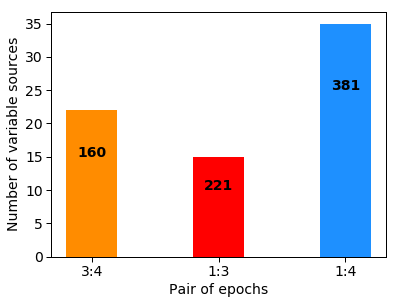

In [246]:
# Histogram of variables in each epoch pair
# NB: can check these numbers from _clean.ipynb when variables were assigned
var_num_1_3 = len((np.where(clean_data['variable_1_3']==1))[0])
print(var_num_1_3)
var_num_1_4 = len((np.where(clean_data['variable_1_4']==1))[0])
print(var_num_1_4)
var_num_3_4 = len((np.where(clean_data['variable_3_4']==1))[0])
print(var_num_3_4)
number_spread = np.array([var_num_3_4,var_num_1_3,var_num_1_4])

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=14)
ig = plt.figure(figsize=(6,4.5))

bars = ('3:4', '1:3', '1:4')
# Choose the position of each barplot on the x-axis
y_pos = [1,3,5]
# Create bars
plt.bar(y_pos, number_spread,color=['darkorange','red','dodgerblue'])
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xlabel("Pair of epochs")
plt.ylabel("Number of variable sources")

# Add baselines to the bars
plt.annotate("160", [1, 15], horizontalalignment='center', size=14, color='black',weight='bold')
plt.annotate("221", [3, 10], horizontalalignment='center', size=14, color='black',weight='bold')
plt.annotate("381", [5, 25], horizontalalignment='center', size=14, color='black',weight='bold')

 
# Show graphic
plt.show()

In [251]:
# Find variable sources!
# Class a source as variable if it shows variability in at least one epoch pair
# Variable source index defined above in variable section (histogram)
variable_data = clean_data[variable_source_idx]
print("Number of variables identified:",len(variable_data))

Number of variables identified: 51


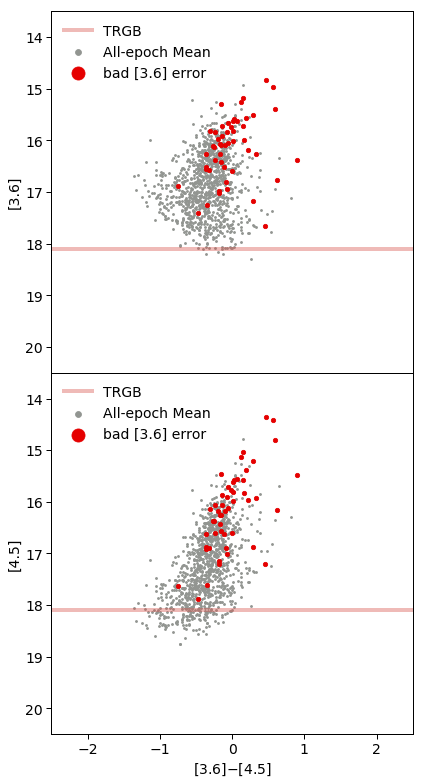

In [101]:
# Mean CMD with variables overplotted

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=14)
plt.figure(figsize=(6,11))

plt.subplot(2,1,1)
# Plot all sensible stars
plt.scatter(clean_data['mean_mag_36']-clean_data['mean_mag_45'], clean_data['mean_mag_36'], s=3.9,color=sns.xkcd_rgb['grey'], label="All-epoch Mean")
# Overplot variable sources
plt.scatter(variable_data['mean_mag_36']-variable_data['mean_mag_45'], variable_data['mean_mag_36'],s=19,color=sns.xkcd_rgb['red'],label="bad [3.6] error")
#plt.xlabel("[3.6]$-$[4.5]", fontsize=14)
plt.ylabel("[3.6]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)
#Add TRGB
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
#plt.axvline(x=1.5)
#plt.axvline(x=-1.6)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
#plt.title('M32 E3', fontsize=18)
#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
#plt.tight_layout()
#plt.show()
#plt.close()


# Repeat for 4.5 on the y-axis
plt.subplot(2,1,2)
#plt.rc('font', family='sans-serif')
#plt.rc("xtick", labelsize=14)
#plt.rc("ytick", labelsize=14)
#plt.rc("axes", labelsize=14)
#plt.rc("legend", fontsize=14)
#plt.figure(figsize=(6,6))
# Plot all sensible stars
plt.scatter(clean_data['mean_mag_36']-clean_data['mean_mag_45'], clean_data['mean_mag_45'], s=3.9,color=sns.xkcd_rgb['grey'], label="All-epoch Mean")
# Overplot variable sources
plt.scatter(variable_data['mean_mag_36']-variable_data['mean_mag_45'], variable_data['mean_mag_45'],s=19,color=sns.xkcd_rgb['red'],label="bad [3.6] error")
plt.xlabel("[3.6]$-$[4.5]", fontsize=14)
plt.ylabel("[4.5]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)
#plt.axvline(x=1.5)
#plt.axvline(x=-1.6)
#Add TRGB
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
#plt.title('M32 E3', fontsize=18)
#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.show()
plt.close()

# Variability

In [13]:
# Create a gaussian function
def gaussian(x, a, b, c):
    val = a * np.exp(-(x - b)**2 / c**2)
    return val

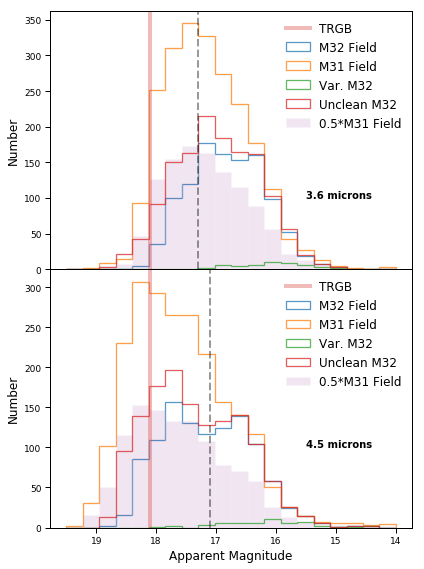

In [255]:
def set_pub():
    """
    Set up some great plot perameters
    """
    plt.rc('font', family='sans-serif')
    #plt.rc("text",  usetex=True)         # Allows latex commands
    plt.rc("xtick", labelsize=11)
    plt.rc("ytick", labelsize=11)
    plt.rc("axes", labelsize=10)
    plt.rc("legend", fontsize=10)
    plt.rc('savefig', dpi=400)           # Higher res outputs for journals
    # plt.rcdefaults()                   # Resets the parameters to their default values

    # For single column figures:
    width = 3.8
    height = width / 1.7

set_pub()


# Setting up plotting sizes

# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=12)
# plt.rcdefaults()                    # Resets the parameters to their default values



# Setting up figure
#fig = plt.figure(figsize=(8, 8))
#fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(6.5, 9.5))
#ax0 = plt.gca()  # Sets up active plot region

# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

############################################################################################################
# Plot a ladder luminosity function of just the core region

# Set up the bin spacing
bw = stats.knuth_bin_width(clean_data['mean_mag_36'])  # Determinal optimal bin size
#bins = np.linspace(12, 20, 31)  # Bin start, end, number +1
bins = np.linspace(14, 19.5, 21)  # Bin start, end, number +1
############################################################################################################


n, edg, patches = ax1.hist(clean_data['mean_mag_36'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="M32 Field", ls="solid")
n, edg, patches = ax1.hist(bgd_data['mag_36_0'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="M31 Field", ls="solid")
rangex = bins+(19.5-14)/(20*2)
ax1.bar(x=rangex[0:len(rangex)-1],height=0.5*n,align='center',linewidth=1.3,edgecolor=(1.0,1.0,1.0,0.0),
       color='purple',width=(19.5-14)/20,alpha=0.1,label='0.5*M31 Field')
n, edg, patches = ax1.hist(variable_data['mean_mag_36'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Var. M32", ls="solid")
n, edg, patches = ax1.hist(unclean_data['mean_mag_36'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Unclean M32", ls="solid")


#ax1.set_xlabel("Apparent Magnitude", fontsize=12)
ax1.set_ylabel("Number", fontsize=12)

#ax1.set_ylim(0,170)

#Add 80% Completness limit
ax1.axvline(x=17.3, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)

#Add TRGB
ax1.axvline(x=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')

#Set legend
ax1.legend(loc=0, frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

# Add wavlength to the panel
ax1.annotate("3.6 microns", [15.5, 100], horizontalalignment='left', size='medium', color='black',weight='bold')




n, edg, patches = ax2.hist(clean_data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="M32 Field", ls="solid")
n, edg, patches = ax2.hist(bgd_data['mag_45_0'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="M31 Field", ls="solid")
ax2.bar(x=rangex[0:len(rangex)-1],height=0.5*n,align='center',linewidth=1.3,edgecolor=(1.0,1.0,1.0,0.0),
       color='purple',width=(19.5-14)/20,alpha=0.1,label='0.5*M31 Field')
n, edg, patches = ax2.hist(variable_data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Var. M32", ls="solid")
n, edg, patches = ax2.hist(unclean_data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Unclean M32", ls="solid")


ax2.set_xlabel("Apparent Magnitude", fontsize=12)
ax2.set_ylabel("Number", fontsize=12)
#ax2.set_ylim(0,169)

#Add 80% Completness limit
ax2.axvline(x=17.1, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)

#Add TRGB
ax2.axvline(x=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')

#Set legend
ax2.legend(loc=0, frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

# Add wavlength to the panel
ax2.annotate("4.5 microns", [15.5, 100], horizontalalignment='left', size='medium', color='black',weight='bold')


plt.gca().invert_xaxis()    # flip the x-axis

#plt.savefig("bla.pdf", bbox_inches='tight')
#plt.tight_layout()
plt.show()
plt.close()


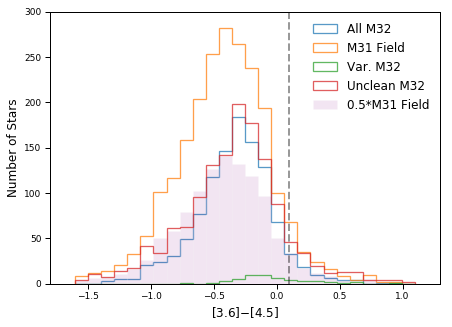

In [259]:
# Setting up plotting sizes

# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=12)
# plt.rcdefaults()                    # Resets the parameters to their default values



# Setting up figure
fig = plt.figure(figsize=(7, 5))
ax1 = plt.gca()  # Sets up active plot region

############################################################################################################
# Plot a ladder luminosity function of just the core region

# Set up the bin spacing
bw = stats.knuth_bin_width(clean_data['mean_mag_36']-clean_data['mean_mag_45'])  # Determinal optimal bin size
bins = np.linspace(-1.6, 1.1, 27)  # Bin start, end, number +1
#bins = np.linspace(12, 20, 41)  # Bin start, end, number +1
############################################################################################################


n, edg, patches = ax1.hist(clean_data['mean_mag_36']-clean_data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="All M32", ls="solid")
n, edg, patches = ax1.hist(bgd_data['mag_36_0']-bgd_data['mag_45_0'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="M31 Field", ls="solid")
rangex = bins+(1.1+1.6)/(26*2)
plt.bar(x=rangex[0:len(rangex)-1],height=0.5*n,align='center',linewidth=1.3,edgecolor=(1.0,1.0,1.0,0.0),
       color='purple',width=(1.1+1.6)/26,alpha=0.1,label='0.5*M31 Field')
n, edg, patches = ax1.hist(variable_data['mean_mag_36']-variable_data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Var. M32", ls="solid")
n, edg, patches = ax1.hist(unclean_data['mean_mag_36']-unclean_data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Unclean M32", ls="solid")

ax1.set_xlabel('[3.6]$-$[4.5]', fontsize=12)
ax1.set_ylabel("Number of Stars", fontsize=12)

#Add 80% Completness limit
ax1.axvline(x=0.1, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)

#Set legend
ax1.legend(loc='upper right', frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

#plt.savefig("bla.pdf", bbox_inches='tight')
#plt.tight_layout()
plt.xlim(-1.8,1.3)
plt.ylim(0,300)
plt.show()
plt.close()


# Write variable data to file

In [267]:
# Write out full variable file
#ascii.write(variable_data,'final_variables.csv',format='csv',overwrite=True)

# Write out variable file for VizieR
ascii.write(variable_data['RA','Dec'],'final_variables_RA_Dec.csv',format='csv',overwrite=True)

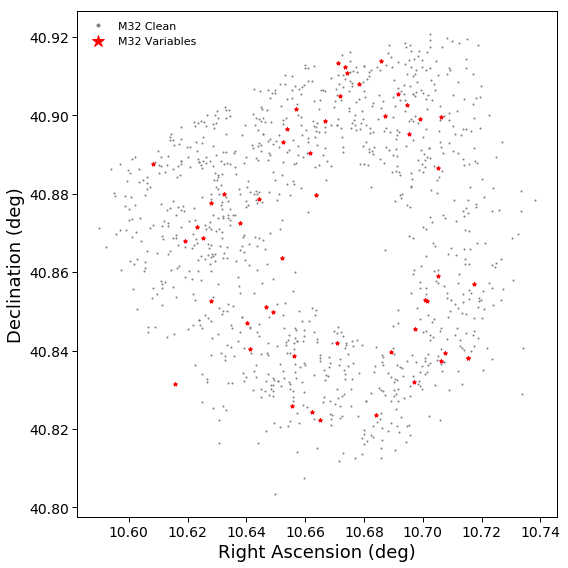

In [263]:
# Location plot of variables
# Setting up figure
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=11)
plt.figure(figsize=(8,8))
ax = plt.gca()                        # Sets up active plot region

# Make the actual plot
plt.plot(clean_data['RA'], clean_data['Dec'], '.', color='grey', ms=2, label="M32 Clean")
plt.plot(variable_data['RA'], variable_data['Dec'], '*', color='red', ms=4, label="M32 Variables")    
plt.xlabel('Right Ascension (deg)', size=18)
plt.ylabel('Declination (deg)', size=18)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
#plt.title('M32 epoch 1',fontsize=18)

#plt.savefig("blah.pdf", bbox_inches='tight')
plt.tight_layout()
plt.show()
plt.close()